In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nhanes-dataset/Sample_Submission.csv
/kaggle/input/nhanes-dataset/Train_Data.csv
/kaggle/input/nhanes-dataset/Test_Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/nhanes-dataset/Train_Data.csv')
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [4]:
data.isna().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [6]:
data.describe()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1954.000000,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000
mean,78683.621801,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,2924.115709,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713
min,73564.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76194.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000
50%,78717.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000
75%,81217.000000,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000
max,83727.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [7]:
data['age_group'].value_counts()

age_group
Adult     1638
Senior     314
Name: count, dtype: int64

In [8]:
data.columns

Index(['SEQN', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT',
       'LBXIN', 'age_group'],
      dtype='object')

In [9]:
cols = ['Idx','Gender','Phys_act','BMI','Glucose','Diabetes_quest','Glucose_tol','Insulin','age_group']
data.columns = cols

In [10]:
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Idx,Gender,Phys_act,BMI,Glucose,Diabetes_quest,Glucose_tol,Insulin,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [11]:
data.drop(columns = 'Idx',inplace = True)
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Phys_act,BMI,Glucose,Diabetes_quest,Glucose_tol,Insulin,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [12]:
data['age_group'] = data['age_group'].map({'Adult': 0, 'Senior': 1})

In [13]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Phys_act,BMI,Glucose,Diabetes_quest,Glucose_tol,Insulin,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0
3,1.0,2.0,28.9,104.0,NaN,84.0,16.15,0.0
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0.0


In [14]:
train_data = data[data['age_group'].notna()].copy()

In [15]:
train_data.shape

(1952, 8)

In [16]:
train_data.isna().sum()

Gender            18
Phys_act          13
BMI               18
Glucose           13
Diabetes_quest    18
Glucose_tol       11
Insulin            9
age_group          0
dtype: int64

In [17]:
train_data['Diabetes_quest'].value_counts()

Diabetes_quest
2.0    1866
3.0      49
1.0      19
Name: count, dtype: int64

In [18]:
import seaborn as sns

<Axes: >

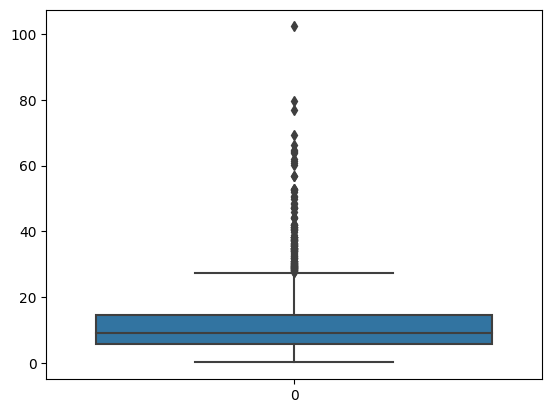

In [19]:
sns.boxplot(train_data['Insulin'])

<Axes: >

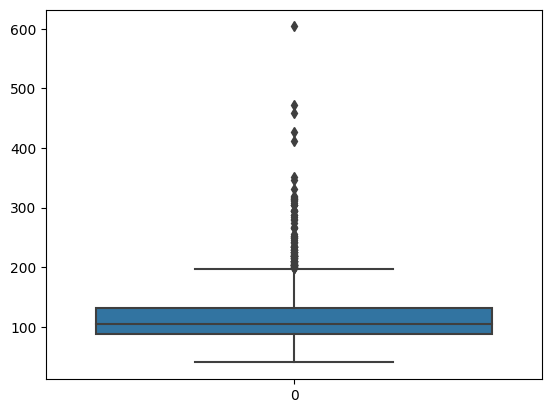

In [20]:
sns.boxplot(train_data['Glucose_tol'])

In [21]:
train_data.columns

Index(['Gender', 'Phys_act', 'BMI', 'Glucose', 'Diabetes_quest', 'Glucose_tol',
       'Insulin', 'age_group'],
      dtype='object')

In [22]:
# Drop rows where Phys_act == 7
train_data = train_data[train_data['Phys_act'] != 7]

In [23]:
from sklearn.impute import KNNImputer

# Define columns
num_cols = ['BMI', 'Glucose', 'Glucose_tol', 'Insulin']
cat_cols = ['Gender', 'Phys_act', 'Diabetes_quest']
all_cols = num_cols + cat_cols
final_df = pd.DataFrame()

# Impute group-wise by 'age_group'
for group, group_df in train_data.groupby('age_group'):
    group_df = group_df.copy()

    # --- Mode Imputation for Categorical Columns ---
    for col in cat_cols:
        mode_val = group_df[col].mode().dropna()
        if not mode_val.empty:
            group_df[col] = group_df[col].fillna(mode_val[0])
        else:
            group_df[col] = group_df[col].fillna(-1)  # fallback

    # --- KNN Imputation for Numeric Columns ---
    imputer = KNNImputer(n_neighbors=3)
    group_df[num_cols] = imputer.fit_transform(group_df[num_cols])

    final_df = pd.concat([final_df, group_df], axis=0)

# Restore original order
final_df = final_df.sort_index()

In [24]:
final_df.isna().sum()

Gender            0
Phys_act          0
BMI               0
Glucose           0
Diabetes_quest    0
Glucose_tol       0
Insulin           0
age_group         0
dtype: int64

In [25]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score, f1_score

# # Define features and target
# X = final_df.drop(columns=['age_group'])  # all columns except target
# y = final_df['age_group']

# # Split into train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train logistic regression model
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Predict on test set
# y_pred = model.predict(X_test)

In [26]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score, f1_score

# # Define features and target
# X = final_df.drop(columns=['age_group'])   # All columns except target
# y = final_df['age_group']

# # Split into train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train Random Forest model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predict on test set
# y_pred = model.predict(X_test)

In [27]:
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score, f1_score

# # Define features and target
# X = final_df.drop(columns=['age_group'])  # All columns except target
# y = final_df['age_group']

# # Split into train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train Decision Tree model
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Predict on test set
# y_pred = model.predict(X_test)

# # Evaluation metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [28]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Define features and target
X = final_df.drop(columns=['age_group'])  # All columns except target
y = final_df['age_group']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8107416879795396
F1 Score: 0.7859239805762123
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       327
         1.0       0.35      0.19      0.24        64

    accuracy                           0.81       391
   macro avg       0.60      0.56      0.57       391
weighted avg       0.77      0.81      0.79       391



In [29]:
test = pd.read_csv('/kaggle/input/nhanes-dataset/Test_Data.csv')

In [30]:
test

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...,...
307,74150.0,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,82550.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,77835.0,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,79281.0,2.0,2.0,22.5,82.0,2.0,93.0,1.39


In [31]:
sample = pd.read_csv('/kaggle/input/nhanes-dataset/Sample_Submission.csv')

In [32]:
sample

,age_group
0,0
1,0
2,0
3,0
4,0
...,...
307,1
308,1
309,1
310,1


In [33]:
test.columns = ['Idx','Gender','Phys_act','BMI','Glucose','Diabetes_quest','Glucose_tol','Insulin']
test

,Idx,Gender,Phys_act,BMI,Glucose,Diabetes_quest,Glucose_tol,Insulin
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...,...
307,74150.0,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,82550.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,77835.0,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,79281.0,2.0,2.0,22.5,82.0,2.0,93.0,1.39


In [34]:
test.drop(columns='Idx', inplace= True)

In [35]:
test.isna().sum()

Gender            2
Phys_act          1
BMI               1
Glucose           1
Diabetes_quest    1
Glucose_tol       2
Insulin           1
dtype: int64

In [36]:
import pandas as pd

# Define columns
num_cols = ['BMI', 'Glucose', 'Glucose_tol', 'Insulin']
cat_cols = ['Gender', 'Phys_act', 'Diabetes_quest']

# Impute numerical columns with median
for col in num_cols:
    if col in test.columns:
        median_val = test[col].median()
        test[col] = test[col].fillna(median_val)

# Impute categorical columns with mode
for col in cat_cols:
    if col in test.columns:
        mode_val = test[col].mode().dropna()
        if not mode_val.empty:
            test[col] = test[col].fillna(mode_val[0])
        else:
            test[col] = test[col].fillna('Unknown')

In [37]:
test.isna().sum()

Gender            0
Phys_act          0
BMI               0
Glucose           0
Diabetes_quest    0
Glucose_tol       0
Insulin           0
dtype: int64

In [38]:
fina = model.predict(test)
fina

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
test_pred = pd.DataFrame(fina)
test_pred.columns = ['age_group']
test_pred

,age_group
0,0
1,1
2,0
3,0
4,0
...,...
307,0
308,0
309,0
310,0


In [40]:
test_pred.value_counts()

age_group
0            281
1             31
Name: count, dtype: int64

In [41]:
test_pred['age_group'][9]

0

In [42]:
test_pred.to_csv('output5.csv', index=False)

In [45]:
fin = pd.read_csv('/kaggle/working/output5.csv')
fin

,age_group
0,0
1,1
2,0
3,0
4,0
...,...
307,0
308,0
309,0
310,0
